Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 4  
Andres Quinto - 18288  
Marlon Hernández - 15177
Javier Prado - 21486

- Link del repositorio: https://github.com/AndresQuinto5/IA_LAB4.git

# Task 1 - Preguntas Teóricas

1. **Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation**  

Un grafo computacional es una forma de representar y modelar cualquier tipo de problemas con data muy extensa, en el cual esta formado por vertices y aristas. Para entrenar una red neural con gradiente descendiente, es nesesario los gradientes relevantes por cada peso, la derivada de la perdida respecto al peso de cada capa de la red neural. Los grafos computacionales son esenciales para calcular gradientes en el entrenamiento de redes neuronales como backpropagation. Estos grafos organizan las operaciones y conexiones en la red, facilitando el cálculo eficiente de cómo cambia la función de pérdida con respecto a cada peso. Esto hace que el proceso de entrenamiento sea más rápido y preciso. (Calculus On Computational Graphs: Backpropagation -- Colah’s Blog, s. f.)

2. **Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo mejoraría el perceptrón que hizo en el laboratorio pasado?**  

Los componentes y pasos que conforman una red neuronal son los siguientes:

- **Neuronas o nodos**: Son las unidades básicas de una red neuronal. Cada neurona toma un conjunto de entradas, realiza cálculos sobre ellas y produce una salida.
- **Conexiones y pesos**: Cada conexión entre neuronas tiene un peso asociado, que determina la importancia de esa conexión. Los pesos se ajustan durante el proceso de aprendizaje.
- **Función de activación**: Determina la salida de una neurona en función de sus entradas. Existen varias funciones de activación, como la función sigmoide, la tangente hiperbólica y la función de paso.
- **Capas**: Las redes neuronales se organizan en capas. Hay una capa de entrada que recibe los datos, una o más capas ocultas donde se realizan los cálculos, y una capa de salida que produce el resultado final.
- **Proceso de aprendizaje**: Durante el proceso de aprendizaje, los pesos de las conexiones se ajustan para minimizar la diferencia entre la salida producida por la red y la salida deseada.  
[Perceptron, ML](https://ciberseguridad.com/guias/nuevas-tecnologias/machine-learning/perceptron/)  

Para mejorar el perceptron que hicimos en el laboratorio anterior, donde unicamente implementamos el perceptron de forma muy trivial podriamos:  

- **Aumentar la complejidad**: Nuestro perceptrón era demasiado simple para capturar la complejidad de los datos (aunque los datos tambien eran simples, pero asumiendo que utilizariamos nuev data), deberiamos agregar más neuronas o capas a la red.
- **Ajustar los parámetros**: Experimentar con diferentes valores para los parámetros de aprendizaje, como la tasa de aprendizaje o el número de épocas.
- **Preprocesamiento de datos**: Mejorar la calidad de los datos mediante técnicas de preprocesamiento, como la normalización o la eliminación de valores atípicos. (asumiendo que tendriamos nueva data y no un conjunto ya realizado)
- **Función de activación**: Experimentar con diferentes funciones de activación para ver si alguna de ellas mejora el rendimiento del perceptrón.

3. **Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.**

El algoritmo de K-means busca minimizar la suma de las distancias cuadráticas de cada objeto al centroide de su cluster. Los objetos se representan con vectores reales de d dimensiones x1,x2,…,xn y el algoritmo k-means construye grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo S={S1,S2,…,}, a su centro

<img src="ecuacion1.jpg"/>

donde  S  es el conjunto de datos cuyos elementos son los objeto  x   representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos K grupos o clusters con su correspondiente centroide μi.  

(El Algoritmo K-means Aplicado A Clasificación y Procesamiento de imagenes, s. f.)

4. **Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means: a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?**  
El PCA  es un método estadístico versátil para reducir una tabla de datos de casos por variables a sus características esenciales, llamadas componentes principales. (Greenacre etal., 2022).
Dado que PCA es una tecnica estadística ampliamente utilizada para la reducción de dimensiones nos ayuda a mejorar nuestros resultados de segmentación, haciendo que mejore el rendimiento de nuestro algoritmo, manteniendo la linealidad de los datos y reduciendo las dimensiones.  (Kaloyanova, 2021)

Referencias:
- Calculus on Computational Graphs: Backpropagation -- colah’s blog. (s. f.). https://colah.github.io/posts/2015-08-Backprop/
- Jesús. (2022, 27 abril). Componentes de una red neuronal. DataSmarts. https://www.datasmarts.net/componentes-de-una-red-neuronal/
- Greenacre, M., Groenen, P. J. F., Hastie, T., D’Enza, A. I., Markos, A., & Tuzhilina, E. (2022). Principal component analysis. Nature Reviews Methods Primers, 2(1). https://doi.org/10.1038/s43586-022-00184-w
https://365datascience.com/tutorials/python-tutorials/
- El algoritmo k-means aplicado a clasificación y procesamiento de imágenes. (s. f.). unioviedo.es. Recuperado 10 de febrero de 2024, de https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html pca-k-means/

# Task 2 - Ejercicios Prácticos

Task 2.1 - K-Means y Segmentación de Clientes de Banco

## Analisis exploratorio

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bank_transactions.csv')
df


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [29]:
df.dropna(inplace=True)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [30]:
df['CustGender'].unique()

array(['F', 'M', 'T'], dtype=object)

Nota: por alguna razon hay un valor T, en la columna de generos, aun siendo mas extraño de que solo haya una persona con este valor, por lo que se toma la decision de eliminar este row.

In [31]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [32]:
print(df.dtypes)


TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object


CustomerDOB y TransactionDate deberian estar en formato de fechas y no de object

In [33]:
#countCustGender

df['CustGender'].value_counts()


CustGender
M    760978
F    280635
Name: count, dtype: int64

In [34]:
# Convert the 'CustomerDOB' column to datetime format
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# Convert the 'TransactionDate' column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


C:\Users\aeqv2\AppData\Local\Temp\ipykernel_18632\3763677705.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\aeqv2\AppData\Local\Temp\ipykernel_18632\3763677705.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


Con la información que tenemos podemos determinar la edad de las personas debido a las fechas de la transaccion y de nacimiento.

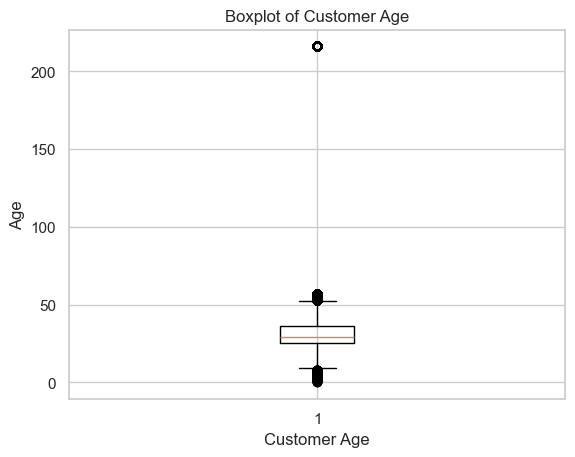

In [35]:
# calculate customer age based on the data time
df['CustomerAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CustomerAge'].value_counts()

# Apply absolute value to all values in 'CustomerAge' column
df['CustomerAge'] = df['CustomerAge'].abs()

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()



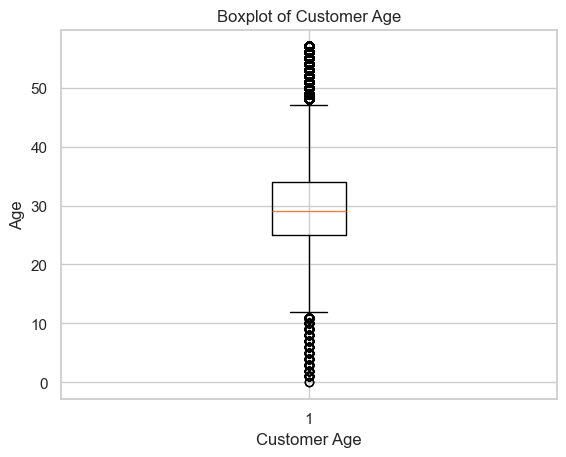

In [36]:
# Drop rows where age is above 100
df = df.drop(df[df['CustomerAge'] > 100].index)

import matplotlib.pyplot as plt

plt.boxplot(df['CustomerAge'])
plt.xlabel('Customer Age')
plt.ylabel('Age')
plt.title('Boxplot of Customer Age')
plt.show()

# Deletes the features that we don't need
df.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    """
    Encodes the categorical features 'CustGender' and 'CustLocation' using LabelEncoder.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the categorical features.

    Returns:
    pandas.DataFrame: The DataFrame with the encoded features.
    """
    # Create an instance of LabelEncoder
    encoder = LabelEncoder()
    # Encode the "CustGender" feature
    df['CustGender_encoded'] = encoder.fit_transform(df['CustGender'])
    # Encode the "CustLocation" feature (assuming it is present in the DataFrame)

    df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation'])

    return df

df = encode_categorical_features(df)
df.drop (columns=['CustGender' , 'CustLocation'] , axis=1 , inplace = True)
df

,CustomerID,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,C5841053,17819.05,2016-02-08,25.0,22,0,3117
1,C2142763,2270.69,2016-02-08,27999.0,41,1,3174
2,C4417068,17874.44,2016-02-08,459.0,20,0,4625
3,C5342380,866503.21,2016-02-08,2060.0,57,0,4625
4,C9031234,6714.43,2016-02-08,1762.5,28,0,4965
...,...,...,...,...,...,...,...
1048562,C8020229,7635.19,2016-09-18,799.0,26,1,5066
1048563,C6459278,27311.42,2016-09-18,460.0,24,1,4943
1048564,C6412354,221757.06,2016-09-18,770.0,27,1,2954
1048565,C6420483,10117.87,2016-09-18,1000.0,38,1,7979


En la función `encode_categorical_features`, se utiliza la clase `LabelEncoder` del módulo `sklearn.preprocessing` para codificar las características categóricas "CustGender" y "CustLocation" en el DataFrame de entrada.

Primero, se crea una instancia del `LabelEncoder` utilizando la siguiente línea de código: $$ encoder = LabelEncoder() $$





Luego, se aplica la codificación a la característica "CustGender" utilizando el método `fit_transform` del `encoder`: $$ df['CustGender_encoded'] = encoder.fit_transform(df['CustGender']) $$





Este método ajusta el `encoder` a los valores únicos presentes en la columna "CustGender" del DataFrame y luego transforma esos valores en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustGender_encoded" en el DataFrame.

A continuación, se aplica la misma codificación a la característica "CustLocation" utilizando el método `fit_transform` nuevamente: $$ df['CustLocation_encoded'] = encoder.fit_transform(df['CustLocation']) $$





Al igual que antes, el `encoder` se ajusta a los valores únicos presentes en la columna "CustLocation" y los transforma en números enteros codificados. Los valores codificados se asignan a una nueva columna llamada "CustLocation_encoded" en el DataFrame.

Es importante tener en cuenta que el método `fit_transform` se utiliza por separado para cada característica categórica. Esto se debe a que el `encoder` necesita ajustarse a los valores únicos de cada característica individualmente para garantizar una codificación coherente.

Finalmente, la función devuelve el DataFrame con las características codificadas:

$$ return df $$



De esta manera, la función `encode_categorical_features` codifica las características categóricas "CustGender" y "CustLocation" utilizando `LabelEncoder` y agrega las columnas codificadas al DataFrame original.

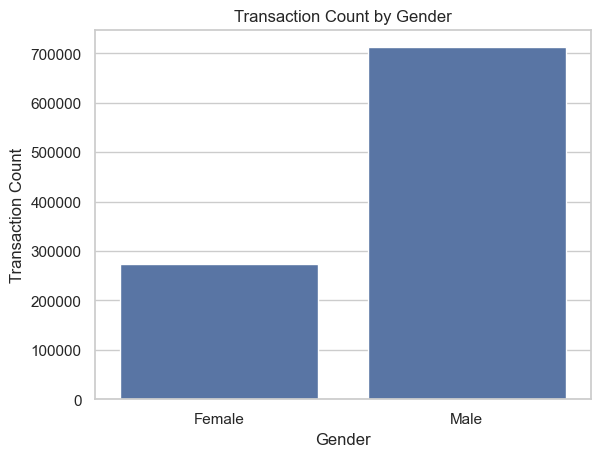

CustGender_encoded
1    712454
0    272868
Name: count, dtype: int64


In [38]:

"""
Plots the transaction count by gender.

Parameters:
df (pandas.DataFrame): The DataFrame containing the gender information.

Returns:
None
"""

gender_counts = df['CustGender_encoded'].value_counts()

# Plot transaction count by gender using seaborn
sns.countplot(data=df, x='CustGender_encoded')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Transaction Count by Gender')
plt.show()

print(gender_counts)


EL objetivo de este grafico es ver graficamente como se distribuyen las transacciones conforme a su genero, en este caso la mayoría son realizadas por hombres.

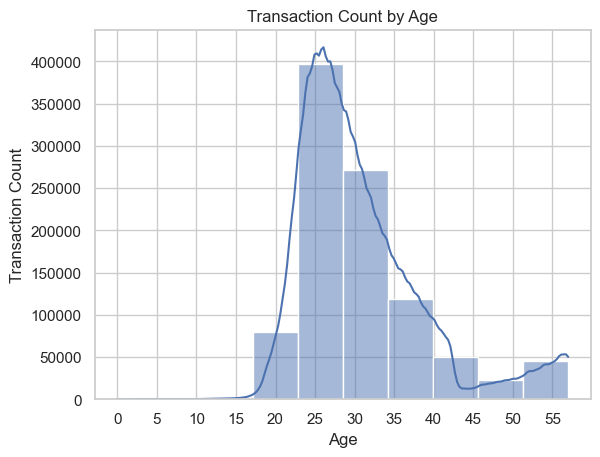

In [39]:

"""
Plots a histogram of transaction count by customer age.

Parameters:
- df: DataFrame containing the data
- x: Column name for the customer age
- bins: Number of bins for the histogram
- kde: Whether to plot a kernel density estimate
"""
sns.histplot(data=df, x='CustomerAge', bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Age')
plt.xticks(range(0, 60, 5))
plt.show()


En esta distribucion similar a campana podemos apreciar que la media de las edades que realizan transacciones se encuentran en las edades de 23 a 35.

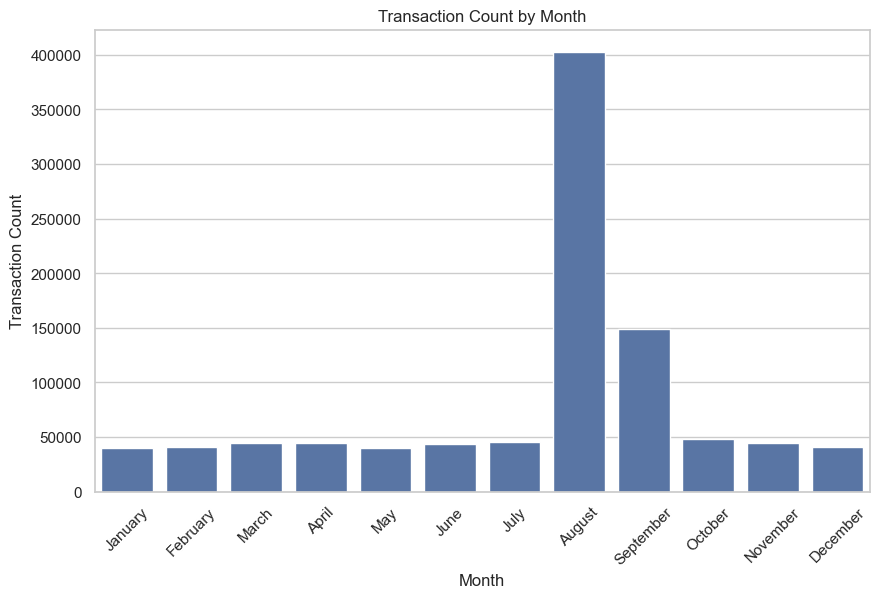

TransactionMonth
January       40232
February      41172
March         44376
April         44820
May           39914
June          43707
July          45926
August       402910
September    148810
October       48186
November      44769
December      40500
Name: count, dtype: int64


In [40]:

# Extract month from TransactionDate
df['TransactionMonth'] = df['TransactionDate'].dt.month

# Count transactions by month
transaction_counts = df['TransactionMonth'].value_counts().sort_index()

# Map month numbers to month names
transaction_counts.index = transaction_counts.index.map(lambda x: calendar.month_name[x])

# Set the style of the plot
sns.set(style="whitegrid")

# Plot transaction count by month using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Month')
plt.xticks(rotation=45)
plt.show()

print(transaction_counts)


Nos parecio curioso que los meses con mayor movimiento de transacciones son los meses de agosto y septiembre, a lo cual encontramos estos datos en internet que podrian explicar el motivo: 

1. La mayor cantidad de transacciones se realizó en el mes de agosto. En agosto, India celebra el Día de la Independencia el 15 de agosto, que es una fiesta nacional. 
[Fiestas de India](https://directiatravel.com/viajes-india/guia/mejor-epoca-viajar/fiestas)  
2. En septiembre de 2016, se celebró el festival de Durga Puja, que es una de las festividades más importantes en varias partes de India. [DurgaPuja](https://issuu.com/indiandiplomacy/docs/india_perspectives_spanish_septembe)

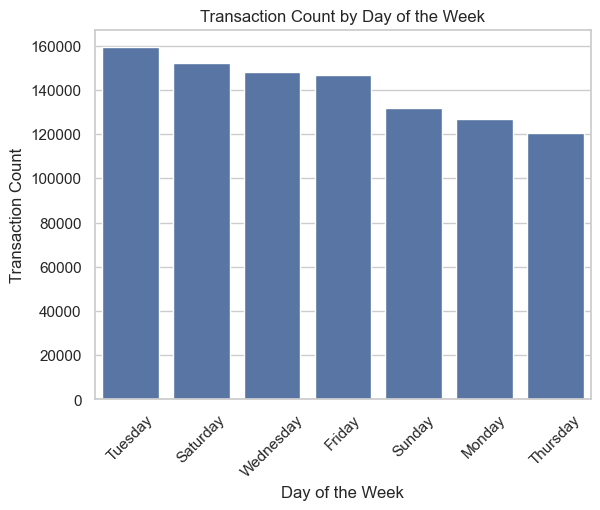

In [41]:
"""
Count transactions by day of the week and plot the transaction count using seaborn.

Parameters:
    df (pandas.DataFrame): The DataFrame containing the transaction data.

Returns:
    None
"""

# Count transactions by day of the week
transaction_counts = df['TransactionDate'].dt.day_name().value_counts().sort_values(ascending=False)

# Plot transaction count by day of the week using seaborn
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, order=transaction_counts.index)
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [42]:
df.head()
df.drop('CustomerID', axis=1, inplace=True)

#### Realizamos una matriz de correlacion

In [43]:
df
correlation_matrix = df.corr()
correlation_matrix

,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded,TransactionMonth
CustAccountBalance,1.000000,0.002662,0.060988,0.088920,0.003487,0.004654,0.001901
TransactionDate,0.002662,1.000000,-0.002988,0.004463,0.001181,0.005953,0.996356
TransactionAmount (INR),0.060988,-0.002988,1.000000,0.094521,-0.014746,0.002837,-0.002765
CustomerAge,0.088920,0.004463,0.094521,1.000000,0.045841,0.006089,0.003142
CustGender_encoded,0.003487,0.001181,-0.014746,0.045841,1.000000,0.021235,0.001422
CustLocation_encoded,0.004654,0.005953,0.002837,0.006089,0.021235,1.000000,0.006231
TransactionMonth,0.001901,0.996356,-0.002765,0.003142,0.001422,0.006231,1.000000


### Pre procesamiento para modelos

In [44]:
df.head()

,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded,TransactionMonth
0,17819.05,2016-02-08,25.0,22,0,3117,2
1,2270.69,2016-02-08,27999.0,41,1,3174,2
2,17874.44,2016-02-08,459.0,20,0,4625,2
3,866503.21,2016-02-08,2060.0,57,0,4625,2
4,6714.43,2016-02-08,1762.5,28,0,4965,2


In [45]:
df = df.drop(columns=['TransactionDate', 'TransactionMonth'], axis=1)

In [46]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,17819.05,25.0,22,0,3117
1,2270.69,27999.0,41,1,3174
2,17874.44,459.0,20,0,4625
3,866503.21,2060.0,57,0,4625
4,6714.43,1762.5,28,0,4965


In [47]:
# numerical_features = ['CustAccountBalance', 'TransactionAmount (INR)']
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Assuming 'CustomerAge' is a continuous feature that should be scaled
# and 'CustLocation_encoded' is a categorical feature with a large range that should be scaled.
numerical_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']
categorical_features_to_scale = ['CustLocation_encoded']  # if needed

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Optionally scale 'CustLocation_encoded' if it's determined necessary
# if categorical_features_to_scale:
#     df[categorical_features_to_scale] = scaler.fit_transform(df[categorical_features_to_scale])

df.head()


,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [48]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [49]:
# df = df.drop(columns=['CustLocation_encoded'], axis=1)

In [50]:
df.head()

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
1,-0.126898,4.323714,1.265929,1,3174
2,-0.107820,-0.161802,-1.325491,0,4625
3,0.929744,0.098957,3.240344,0,4625
4,-0.121465,0.050503,-0.338284,0,4965


In [51]:
df.duplicated().sum()

168584

In [52]:
df.shape

(985322, 5)

                PC1       PC2
0       -479.407070 -0.865388
1       -422.407052  3.149461
2       1028.592929 -0.984848
3       1028.592945  2.565969
4       1368.592933 -0.260871
...             ...       ...
985317  1469.592936 -0.491946
985318  1346.592936 -0.662716
985319  -642.407063 -0.266771
985320  4382.592941  0.437197
985321  2246.592939  0.044263

[985322 rows x 2 columns]


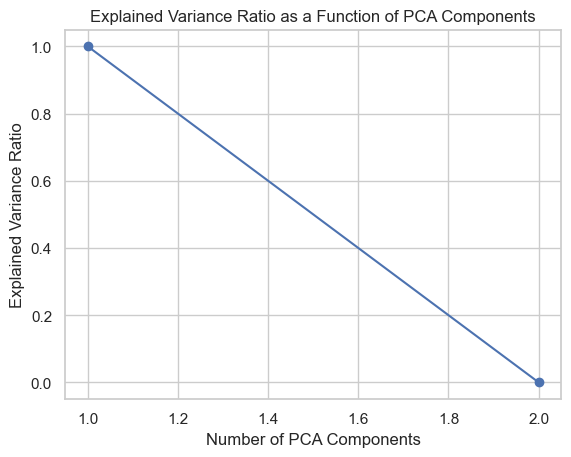

Explained Variance Ratio: [9.99999263e-01 2.67932115e-07]


In [60]:
from sklearn.decomposition import PCA
import seaborn as sns
df 
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to the dataframe
df_pca = pca.fit_transform(df)

# Create a new dataframe with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Print the transformed dataframe
print(df_pca)

import matplotlib.pyplot as plt

# Fit PCA to the dataframe
pca.fit(df)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# # Plot the explained variance ratio as a function of PCA components
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
# plt.xlabel('Number of PCA Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio as a Function of PCA Components')
# plt.show()

# # Print the explained variance ratio
# print('Explained Variance Ratio:', explained_variance_ratio)


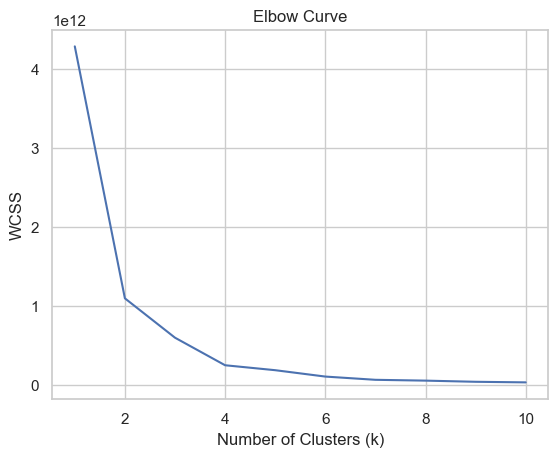

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_curve(df, features):
    """
    Plots the elbow curve for K-means clustering.

    Parameters:
    - df (pandas.DataFrame): The dataset to perform clustering on.
    - features (list): The list of features to use for clustering.

    Returns:
    None
    """

    # Create an empty list to store the WCSS values
    wcss = []

    # Iterate over different values of k
    for k in range(1, 11):
        # Create a KMeans instance with k clusters
        kmeans = KMeans(n_clusters=k, random_state=0)
        
        # Fit the model to the data
        kmeans.fit(df[features])
        
        # Append the WCSS value to the list
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Elbow Curve')
    plt.show()

# plot_elbow_curve(df, features=['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge', 'CustGender_encoded', 'CustLocation_encoded'])
# plot_elbow_curve(df, features=['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge', 'CustGender_encoded'])

In [54]:
from scipy import stats

# Assuming 'df' is your DataFrame and it contains only numerical features
z_scores = np.abs(stats.zscore(df))
outlier_locations = (z_scores > 3).any(axis=1)
df_cleaned = df[~outlier_locations]
df_cleaned

,CustAccountBalance,TransactionAmount (INR),CustomerAge,CustGender_encoded,CustLocation_encoded
0,-0.107888,-0.232489,-1.078689,0,3117
2,-0.107820,-0.161802,-1.325491,0,4625
4,-0.121465,0.050503,-0.338284,0,4965
6,-0.128484,-0.144375,-0.831888,0,4625
7,-0.013431,-0.212455,0.402122,1,4625
...,...,...,...,...,...
1048562,-0.120339,-0.106425,-0.585086,1,5066
1048563,-0.096282,-0.161639,-0.831888,1,4943
1048564,0.141454,-0.111148,-0.461685,1,2954
1048565,-0.117304,-0.073688,0.895726,1,7979


Utilizando el metodo del codo podemos ver que cuanto graficamos los clusters vs el valor de WCSS, podemos ver que la curva se suaviza alrededor de cuando los clusters son 4 indicandonos que es un buen numero de clusters a elegir.

In [55]:
df_cleaned_copy = df_cleaned.copy()
# df = df.drop(columns=['CustLocation_encoded'], axis=1)
df_cleaned_copy = df_cleaned_copy.drop(columns=['CustLocation_encoded'], axis=1)

### Aqui utilizamos el metodo de PCA y codo:

Esto debido a que:
- El principal objetivo de PCA es reducir la dimensionalidad de un conjunto de datos mientras se preserva la mayor cantidad de información posible. Permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Genera un nuevo conjunto de variables, llamadas componentes principales, cada una de las cuales es una combinación lineal de las variables originales. cita: [PCA](https://es.mathworks.com/help/stats/principal-component-analysis-pca.html)

- Por otro lado el elbow method es una técnica utilizada en el aprendizaje no supervisado para determinar el número óptimo de clusters en un algoritmo de agrupamiento, como K-means, implica ejecutar el algoritmo de agrupamiento para un rango de valores de “k” (número de clusters), y para cada valor de “k”, se calcula la suma total de los cuadrados dentro del cluster (WCSS). A medida que aumenta “k”, la WCSS disminuirá porque los puntos estarán más cerca de los centroides a los que están asignados. Cita: [Aprendizaje no supervisado](https://bookdown.org/dparedesi/data-science-con-r/aprendizaje-no-supervisado.html)

                PC1       PC2
0       -478.262985 -1.039290
1       1029.737014 -1.283492
2       1369.737016 -0.288010
3       1029.737015 -0.792040
4       1029.737022  0.469289
...             ...       ...
953808  1470.737020 -0.513735
953809  1347.737019 -0.761485
953810  -641.262980 -0.371809
953811  4383.737023  0.957033
953812  2247.737021  0.230597

[953813 rows x 2 columns]


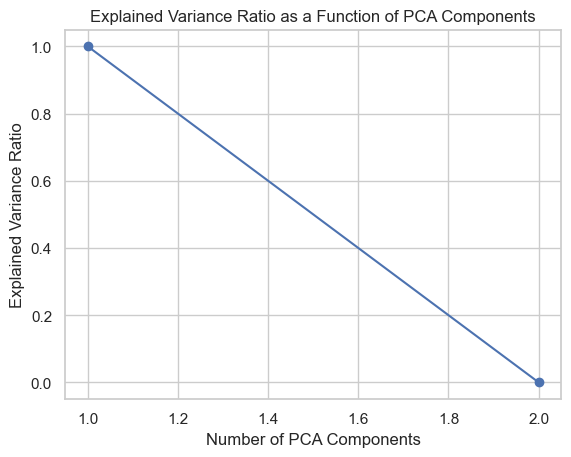

Explained Variance Ratio: [9.99999733e-01 1.86063668e-07]


In [65]:
df 
# Create an instance of PCA with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to the dataframe
df_pca = pca.fit_transform(df_cleaned)

# Create a new dataframe with the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Print the transformed dataframe
print(df_pca)

import matplotlib.pyplot as plt

# Fit PCA to the dataframe
pca.fit(df_cleaned)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio as a function of PCA components
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio as a Function of PCA Components')
plt.show()

# Print the explained variance ratio
print('Explained Variance Ratio:', explained_variance_ratio)

### Grafica PCA:                                                                                                                                
Una gráfica que compara el número de componentes del Análisis de Componentes Principales (PCA) versus la proporción de varianza explicada se utiliza para determinar cuántos componentes principales se deben retener en un análisis.

El PCA es una técnica que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales.

cita: [Análisis de componentes principales (PCA)](https://es.mathworks.com/help/stats/principal-component-analysis-pca.html)

In [68]:
df_pca

,PC1,PC2
0,-478.262985,-1.039290
1,1029.737014,-1.283492
2,1369.737016,-0.288010
3,1029.737015,-0.792040
4,1029.737022,0.469289
...,...,...
953808,1470.737020,-0.513735
953809,1347.737019,-0.761485
953810,-641.262980,-0.371809
953811,4383.737023,0.957033


c:\Users\aeqv2\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


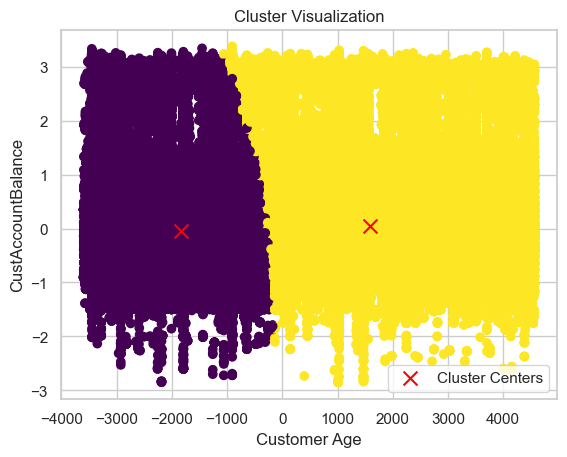

In [69]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Specify the number of components/clusters for the GMM
n_components = 2

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=0)

# Fit the GMM to the data
gmm.fit(df_pca)

# Get the predicted cluster labels for each sample
cluster_labels = gmm.predict(df_pca)

# Add the cluster labels as a new column in the DataFrame
df_pca['Cluster'] = cluster_labels

# Plot the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel('Customer Age')
plt.ylabel('CustAccountBalance')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

# 

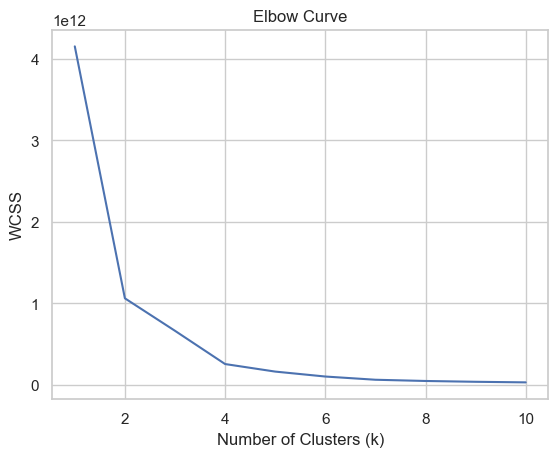

In [73]:
plot_elbow_curve(df_pca, features=['PC1', 'PC2'])

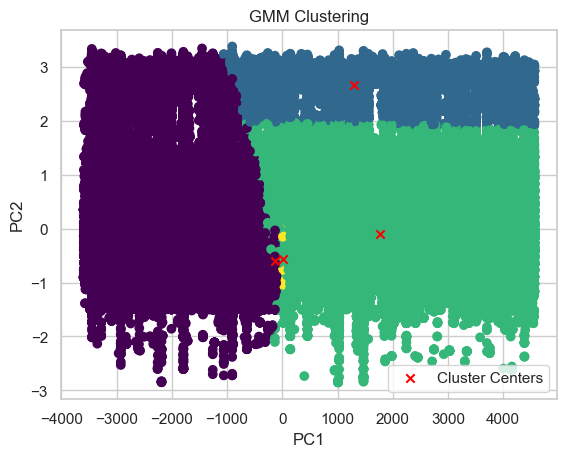

In [77]:
import numpy as np
epsilon = 1e-6
def gaussian(x, mu, sigma):
    """
    Calculate the probability density function of a Gaussian distribution.

    Parameters:
    x (numpy.ndarray): Input data.
    mu (numpy.ndarray): Mean of the Gaussian distribution.
    sigma (numpy.ndarray): Covariance matrix of the Gaussian distribution.

    Returns:
    numpy.ndarray: Probability density function values.
    """
    d = x.shape[1]
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    norm = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_sigma))
    exponent = -0.5 * np.sum(np.dot((x - mu), inv_sigma) * (x - mu), axis=1)
    if np.any(np.isnan(norm)) or np.any(np.isnan(exponent)):
        print(f"Warning: norm or exponent has NaN values. This may indicate a problem with sigma:\n{sigma}")
    return norm * np.exp(exponent)

def initialize_parameters(X, K):
    """
    Initialize the parameters for the GMM.

    Parameters:
    X (numpy.ndarray): Input data.
    K (int): Number of clusters.

    Returns:
    numpy.ndarray: Initial means.
    numpy.ndarray: Initial covariance matrices.
    numpy.ndarray: Initial mixing coefficients.
    """
    d = X.shape[1]
    mu = np.random.rand(K, d)
    sigma = np.array([np.eye(d)] * K)
    pi = np.ones(K) / K
    return mu, sigma, pi

def expectation_step(X, mu, sigma, pi):
    """
    Perform the expectation step of the GMM algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    mu (numpy.ndarray): Means of the Gaussian distributions.
    sigma (numpy.ndarray): Covariance matrices of the Gaussian distributions.
    pi (numpy.ndarray): Mixing coefficients of the Gaussian distributions.

    Returns:
    numpy.ndarray: Responsibilities.
    """
    K = mu.shape[0]
    N = X.shape[0]
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * gaussian(X, mu[k], sigma[k])
    
    # Check for any sums that are zero (or very close to zero)
    sum_gamma = np.sum(gamma, axis=1, keepdims=True)
    if np.any(sum_gamma == 0):
        # Handle the case where the sum is zero
        # For example, add a small constant to avoid division by zero
        sum_gamma[sum_gamma == 0] = np.finfo(float).eps

    gamma /= sum_gamma
    return gamma

def maximization_step(X, gamma):
    """
    Perform the maximization step of the GMM algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    gamma (numpy.ndarray): Responsibilities.

    Returns:
    numpy.ndarray: Updated means.
    numpy.ndarray: Updated covariance matrices.
    numpy.ndarray: Updated mixing coefficients.
    """
    N, d = X.shape
    K = gamma.shape[1]
    mu = np.zeros((K, d))
    sigma = np.zeros((K, d, d))
    pi = np.zeros(K)
    for k in range(K):
        Nk = np.sum(gamma[:, k])
        if Nk == 0:
            # print(f"Warning: Nk is zero for cluster {k}. This may indicate an issue with the gamma values.")
            continue
        mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / Nk
        X_centered = X - mu[k]
        sigma[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk
        sigma[k] += np.eye(d) * epsilon  # Ensure positive definiteness
        pi[k] = Nk / N
    return mu, sigma, pi

def log_sum_exp(Z):
    max_Z = np.max(Z, axis=1, keepdims=True)
    return max_Z + np.log(np.sum(np.exp(Z - max_Z), axis=1, keepdims=True))

def gmm(X, K, max_iter=1000, tol=1e-6):
    """
    Perform Gaussian Mixture Model clustering.

    Parameters:
    X (numpy.ndarray): Input data.
    K (int): Number of clusters.
    max_iter (int): Maximum number of iterations.
    tol (float): Convergence tolerance.

    Returns:
    numpy.ndarray: Cluster labels.
    numpy.ndarray: Means of the Gaussian distributions.
    numpy.ndarray: Covariance matrices of the Gaussian distributions.
    numpy.ndarray: Mixing coefficients of the Gaussian distributions.
    """
    mu, sigma, pi = initialize_parameters(X, K)
    prev_log_likelihood = -np.inf
    for _ in range(max_iter):
        gamma = expectation_step(X, mu, sigma, pi)
        mu, sigma, pi = maximization_step(X, gamma)
        log_likelihood = np.sum(log_sum_exp(gamma))
        # Print log likelihood to see if it's increasing and the means to see if they're converging
        # print(f"Iteration {_}, Log Likelihood: {log_likelihood}")
        # print(f"Means: {mu}")

        if np.abs(log_likelihood - prev_log_likelihood) < tol:
            break
        prev_log_likelihood = log_likelihood
    labels = np.argmax(gamma, axis=1)
    return labels, mu, sigma, pi


# # Usage example
# X = df_cleaned_copy.values  # Assuming df is your input data
# K = 4  # Number of clusters
# labels, mu, sigma, pi = gmm(X, K)

# import matplotlib.pyplot as plt

# # Scatter plot of the data points colored by cluster labels
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='x', label='Cluster Centers')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('GMM Clustering')
# plt.legend()
# plt.show()

# Usage example
X = df_pca.values  # Assuming df is your input data
K = 4  # Number of clusters
labels, mu, sigma, pi = gmm(X, K)

import matplotlib.pyplot as plt
df_pca['ClusterCenters'] = labels
# Scatter plot of the data points colored by cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM Clustering')
plt.legend()
plt.show()